In [16]:
import numpy as np
import matplotlib.pyplot as plt

from pybasicbayes.util.text import progprint_xrange
from pyhsmm.basic.distributions import PoissonDuration

import pyhsmm_spiketrains.models
import importlib

importlib.reload(pyhsmm_spiketrains.models)

<module 'pyhsmm_spiketrains.models' from '/Users/mahdiyar/Documents/GitHub/pyhsmm_spiketrains/pyhsmm_spiketrains/models.py'>

In [17]:
# Set the seed
seed = 0
print("setting seed to ", seed)
np.random.seed(seed)

# Generate a synthetic dataset
N = 25          # Number of neurons
K = 20          # Number of states
T = 1000        # Number of time bins to simulate
T_test = 200    # Number of time bins to hold out for testing
N_iter = 500    # Number of iterations of Gibbs sampling

setting seed to  0


In [18]:
# Simulate from an HMM with a known transition matrix
true_A = np.eye(K) + 0.25*np.random.rand(K,K)
true_A /= true_A.sum(axis=1)[:,None]
true_hmm = pyhsmm_spiketrains.models.PoissonHMM(N=N, K=K, trans_matrix=true_A)

In [19]:
# Generate test spike trains (S) and their underlying state sequences (Z)
S_train, _ = true_hmm.generate(T)
S_test, _ = true_hmm.generate(T_test)
true_hmm.relabel_by_usage()
Z_train, Z_test = true_hmm.stateseqs
N_used = len(true_hmm.used_states)
print("Number of used states: ", N_used)

Number of used states:  20


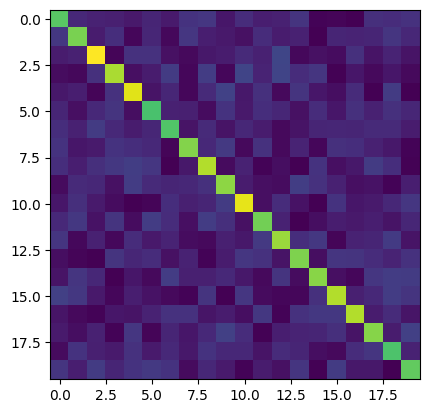

In [20]:
import matplotlib.pyplot as plt
plt.imshow(true_A)

In [24]:
# Create a test model with the same parameters, and add the data
test_hmm = pyhsmm_spiketrains.models.PoissonHDPHMM(N=N, K_max=100)
test_hmm.add_data(S_train)

# Fit the test model with Gibbs sampling
lls = []
pred_lls = []
for itr in progprint_xrange(N_iter):
    test_hmm.resample_model()

    # Collect the log likelihood and predictive log likelihood
    lls.append(test_hmm.log_likelihood(S_train))
    pred_lls.append(test_hmm.log_likelihood(S_test))

.........................  [  25/500,    0.19sec avg, ETA 01:32 ]
.........................  [  50/500,    0.19sec avg, ETA 01:26 ]
.........................  [  75/500,    0.19sec avg, ETA 01:21 ]
.........................  [ 100/500,    0.19sec avg, ETA 01:16 ]
.........................  [ 125/500,    0.19sec avg, ETA 01:11 ]
.........................  [ 150/500,    0.19sec avg, ETA 01:06 ]
.........................  [ 175/500,    0.19sec avg, ETA 01:02 ]
.........................  [ 200/500,    0.19sec avg, ETA 56.68 ]
.........................  [ 225/500,    0.19sec avg, ETA 51.89 ]
.........................  [ 250/500,    0.19sec avg, ETA 47.10 ]
.........................  [ 275/500,    0.19sec avg, ETA 42.31 ]
.........................  [ 300/500,    0.19sec avg, ETA 37.53 ]
.........................  [ 325/500,    0.19sec avg, ETA 32.82 ]
.........................  [ 350/500,    0.19sec avg, ETA 28.11 ]
.........................  [ 375/500,    0.19sec avg, ETA 23.42 ]
..........

In [25]:
# Get the inferred state sequence
test_hmm.relabel_by_usage()
Z_train_inf = test_hmm.stateseqs[0]
N_used_inf = len(test_hmm.used_states)

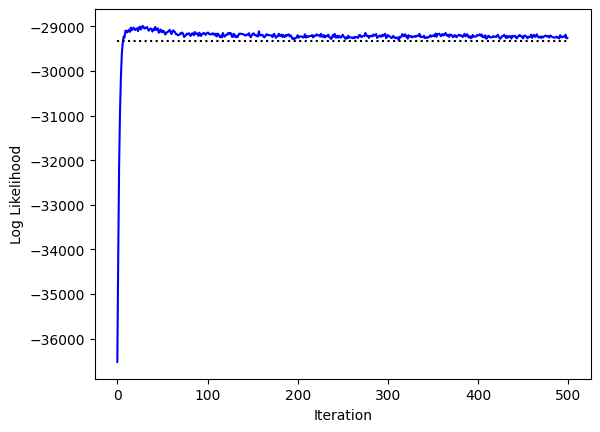

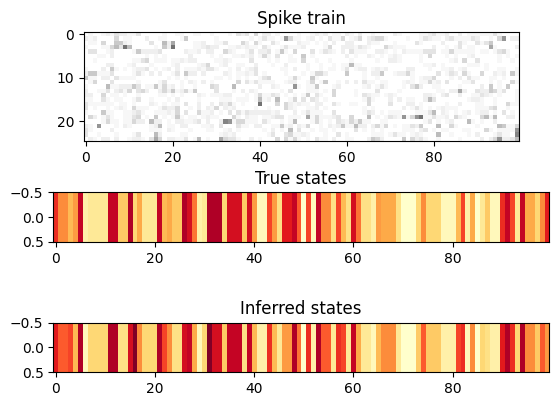

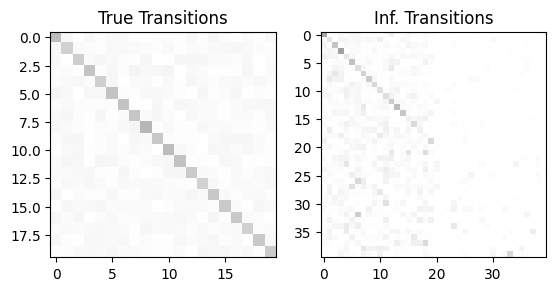

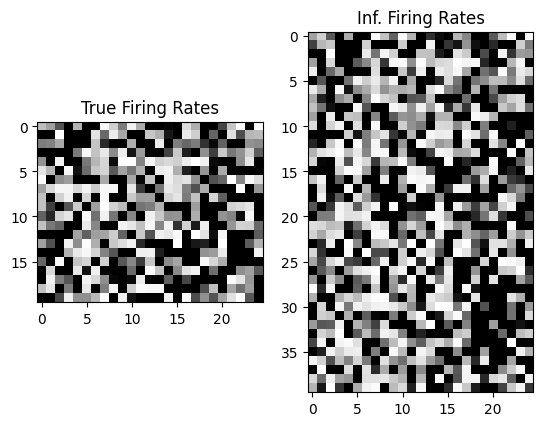

In [26]:
# Plot the log likelihood over time
plt.figure()
plt.plot(lls, 'b')
plt.plot([0,N_iter], true_hmm.log_likelihood(S_train) * np.ones(2), ':k')
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")

# Visualize the data and the true and inferred state sequences
plt.figure()
plt.subplot(311)
plt.imshow(S_train.T[:,:100], interpolation="none", cmap="Greys", vmin=0, vmax=S_train.max())
plt.title("Spike train")
plt.subplot(312)
plt.imshow(Z_train.reshape((1,-1))[:,:100], aspect=10.0, cmap="YlOrRd", interpolation="none", vmin=0, vmax=N_used)
plt.title("True states")
plt.subplot(313)
plt.title("Inferred states")
plt.imshow(Z_train_inf.reshape((1,-1))[:,:100], aspect=10.0, cmap="YlOrRd", interpolation="none", vmin=0, vmax=N_used)

# Visualize the true and inferred transition matrices
plt.figure()
plt.subplot(121)
plt.imshow(true_hmm.A[:N_used, :N_used], interpolation="none", cmap="Greys", vmin=0, vmax=1)
plt.title("True Transitions")
plt.subplot(122)
plt.imshow(test_hmm.A[:N_used_inf, :N_used_inf], interpolation="none", cmap="Greys", vmin=0, vmax=1)
plt.title("Inf. Transitions")

# Visualize the true and inferred firing rates
plt.figure()
plt.subplot(121)
plt.imshow(true_hmm.rates[:N_used, :], interpolation="none", cmap="Greys", vmin=0, vmax=1)
plt.title("True Firing Rates")
plt.subplot(122)
plt.imshow(test_hmm.rates[:N_used_inf, :], interpolation="none", cmap="Greys", vmin=0, vmax=1)
plt.title("Inf. Firing Rates")

plt.show()
